# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Lists and DF Setup

In [2]:
# List for holding lat, lng, temp, humidity, cloud cover, wind speed, cities, and country
lats = []
lngs = []
lat_lngs = []
temps = []
humidity = []
clouds = []
wind = []
cities = []
countries = []
names = []
date_time = []

# Create blank DataFrame
weatherDF = pd.DataFrame(columns={})

## Generate Cities List

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Declare OpenWeather base URL and counter variables
count = 1

baseURL = 'http://api.openweathermap.org/data/2.5/weather?'

# Reset lats, lngs, cities, and countries
lats = []
lngs = []

# Create for loop where you try to call the OpenWeather API for the cities in the cities list
for city in cities:
    try:
        params = {
            'appid':api_key,
            'units':'metric',
            'q':city
            }
        response = requests.get(baseURL, params=params).json()
        # Append names list
        names.append(response['name'])
        # Append countries list
        countries.append(response['sys']['country'])
        # Append temps list
        temps.append(response['main']['temp'])
        # Append humidity list
        humidity.append(response['main']['humidity'])
        # Append clouds list
        clouds.append(response['clouds']['all'])
        # Append wind list
        wind.append(response['wind']['speed'])
        # Append lats list
        lats.append(response['coord']['lat'])
        # Append lngs list
        lngs.append(response['coord']['lon'])
        # Append date_time list
        now = datetime.datetime.now()
        today = now.strftime('%Y-%m-%d %H:%M')
        date_time.append(today)
        # Print processing message and increase counter variable by 1
        print("Processing Record " + str(count) + " | " + response['name'])
        count += 1
    except KeyError:
        print('City not found. Skipping...')
        continue

Processing Record 1 | Bluff
Processing Record 2 | Sinnamary
Processing Record 3 | Rikitea
Processing Record 4 | Shelburne
Processing Record 5 | Carnarvon
Processing Record 6 | Norman Wells
Processing Record 7 | Sitka
City not found. Skipping...
Processing Record 8 | Waipawa
Processing Record 9 | Ostrovnoy
Processing Record 10 | Hermanus
Processing Record 11 | Catuday
Processing Record 12 | Busselton
Processing Record 13 | Lompoc
Processing Record 14 | San Policarpo
Processing Record 15 | Mataura
City not found. Skipping...
Processing Record 16 | Chase
Processing Record 17 | Cabo San Lucas
Processing Record 18 | Isangel
Processing Record 19 | Mount Isa
Processing Record 20 | Torbay
Processing Record 21 | Chokurdakh
Processing Record 22 | Kidal
City not found. Skipping...
Processing Record 23 | Kapaa
Processing Record 24 | New Norfolk
Processing Record 25 | Tuktoyaktuk
Processing Record 26 | Aklavik
Processing Record 27 | Santa Lucia
Processing Record 28 | Nalhati
Processing Record 29 | 

Processing Record 225 | Pangnirtung
Processing Record 226 | Ancud
Processing Record 227 | Vangaindrano
Processing Record 228 | Waddan
City not found. Skipping...
Processing Record 229 | Urengoy
Processing Record 230 | Jumla
Processing Record 231 | Daru
Processing Record 232 | Tabou
Processing Record 233 | Road Town
Processing Record 234 | Auki
Processing Record 235 | Thinadhoo
Processing Record 236 | Diffa
Processing Record 237 | Harmanli
Processing Record 238 | Vostok
Processing Record 239 | Penedo
Processing Record 240 | Agua Dulce
Processing Record 241 | Namibe
Processing Record 242 | Kodiak
Processing Record 243 | Zaozerne
Processing Record 244 | Nuuk
Processing Record 245 | Pitimbu
Processing Record 246 | Dzilam Gonzalez
Processing Record 247 | Portland
Processing Record 248 | Kavaratti
City not found. Skipping...
Processing Record 249 | Coquimbo
City not found. Skipping...
Processing Record 250 | Minab
Processing Record 251 | Jorpeland
City not found. Skipping...
Processing Recor

Processing Record 448 | Bemidji
Processing Record 449 | Sobolevo
Processing Record 450 | Soyo
Processing Record 451 | Chibuto
Processing Record 452 | Cockburn Town
Processing Record 453 | Fengzhen
Processing Record 454 | Kruisfontein
Processing Record 455 | Huaiyin
Processing Record 456 | Kalmunai
Processing Record 457 | Sovetskiy
Processing Record 458 | La Asuncion
Processing Record 459 | Henties Bay
Processing Record 460 | Zaysan
Processing Record 461 | Piterka
Processing Record 462 | Ambilobe
Processing Record 463 | Rome
Processing Record 464 | Katsuura
City not found. Skipping...
Processing Record 465 | Nerchinsk
Processing Record 466 | Ahipara
Processing Record 467 | Xinyang
Processing Record 468 | Longyearbyen
Processing Record 469 | Chiredzi
Processing Record 470 | Kjollefjord
Processing Record 471 | Mecca
Processing Record 472 | San Francisco
Processing Record 473 | Winslow
Processing Record 474 | Eyl
Processing Record 475 | Ust-Nera
Processing Record 476 | Udachnyy
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Add appended lists into weatherDF
weatherDF['City'] = names
weatherDF['Country'] = countries
weatherDF['Latitude'] = lats
weatherDF['Longitude'] = lngs
weatherDF['Temperature (C)'] = temps
weatherDF['Cloud Cover'] = clouds
weatherDF['Humidity'] = humidity
weatherDF['Wind Speed (m/s)'] = wind
weatherDF['Current as of:'] = date_time

In [6]:
weatherDF.to_csv('city_weather.csv')
weatherDF.head()

,City,Country,Latitude,Longitude,Temperature (C),Cloud Cover,Humidity,Wind Speed (m/s),Current as of:
0,Bluff,AU,-23.58,149.07,15.95,0,28,1.52,2019-09-04 14:12
1,Sinnamary,GF,5.38,-52.96,27.95,94,76,8.84,2019-09-04 14:12
2,Rikitea,PF,-23.12,-134.97,22.75,95,71,3.31,2019-09-04 14:12
3,Shelburne,CA,44.08,-80.20,17.04,90,72,5.10,2019-09-04 14:12
4,Carnarvon,ZA,-30.97,22.13,16.45,12,18,6.01,2019-09-04 14:12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
now = datetime.datetime.now()
today = now.strftime('%Y-%m-%d %H:%M')

#### Latitude vs. Temperature Plot

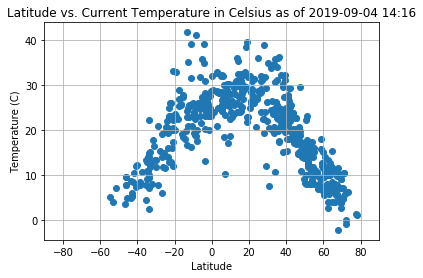

In [8]:
plt.scatter(weatherDF['Latitude'], weatherDF['Temperature (C)'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Latitude vs. Current Temperature in Celsius as of ' + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig('temperature.png')

#### Latitude vs. Humidity Plot

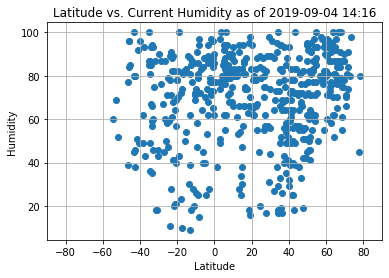

In [9]:
plt.scatter(weatherDF['Latitude'], weatherDF['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Current Humidity as of ' + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig('humidity.png')

#### Latitude vs. Cloudiness Plot

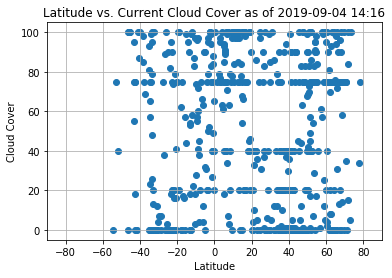

In [10]:
plt.scatter(weatherDF['Latitude'], weatherDF['Cloud Cover'])
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.title('Latitude vs. Current Cloud Cover as of ' + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig('cloud_cover.png')

#### Latitude vs. Wind Speed Plot

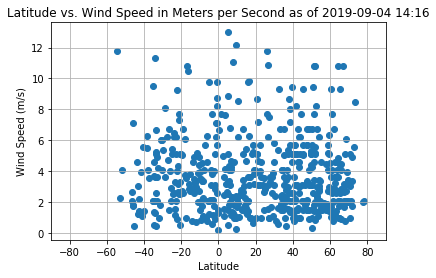

In [11]:
plt.scatter(weatherDF['Latitude'], weatherDF['Wind Speed (m/s)'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed in Meters per Second as of ' + today)
plt.grid()
plt.xlim(-90, 90)
plt.savefig('wind_speed.png')